Para lidar com que lingua, caso use um maior com mais datas

https://www.kaggle.com/leticehs/nlp1-part1-dataset-cut

In [2]:
#imports 
#Tirando os warnings
import warnings
warnings.filterwarnings("ignore")
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import math
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import balanced_accuracy_score

In [3]:

# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        return "Positive"
 
    elif sentiment_dict['compound'] <= - 0.05 :
         return  "Negative"
 
    else :
         return "Neutral"

**Resumo diário dos preço**

In [4]:
# https://www.kaggle.com/mczielinski/bitcoin-historical-data
dfPrice = pd.read_csv('/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
dfPrice

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [5]:
dfPrice = dfPrice.dropna(how="all",subset=dfPrice.columns[1:])
dfPrice['Timestamp'] = pd.to_datetime(dfPrice['Timestamp'], unit='s')
# set index timestamp column
dfPrice = dfPrice.set_index("Timestamp")
#Avaliando só em um mês
#three month
#data inicial
dataIni='2016-01-01'
#data final
dataFim='2019-03-29'
dfPrice["Date"] = dfPrice.index.date
dfPrice = dfPrice[dataIni : dataFim] 
dfMaxMin_perDay  = pd.concat([dfPrice.groupby("Date").max().add_suffix('_max'), dfPrice.groupby("Date").min().add_suffix('_min')], axis=1)
dfMaxMin_perDay 

,Open_max,High_max,Low_max,Close_max,Volume_(BTC)_max,Volume_(Currency)_max,Weighted_Price_max,Open_min,High_min,Low_min,Close_min,Volume_(BTC)_min,Volume_(Currency)_min,Weighted_Price_min
Date,,,,,,,,,,,,,,
2016-01-01,436.00,436.00,436.00,436.00,190.517583,8.287514e+04,436.000000,427.66,427.66,427.20,427.28,0.005424,2.351308,427.660000
2016-01-02,435.99,435.99,435.99,435.99,151.286879,6.580372e+04,435.990000,430.60,430.70,430.42,430.50,0.011481,5.000000,430.601860
2016-01-03,433.89,434.09,433.89,433.96,165.870201,7.084861e+04,433.890000,424.15,424.15,424.06,424.06,0.011411,4.878782,424.126493
2016-01-04,435.49,435.86,435.49,435.86,574.487586,2.495248e+05,435.490000,428.46,428.50,428.44,428.47,0.011300,4.884990,428.463216
2016-01-05,435.37,435.39,435.37,435.39,202.789091,8.752876e+04,435.370000,429.53,429.58,429.50,429.52,0.000349,0.151903,429.513580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-25,3978.19,3980.22,3978.19,3978.19,357.918590,1.397080e+06,3978.190000,3864.27,3865.79,3850.45,3859.54,0.001371,5.449384,3860.201628
2019-03-26,3923.17,3936.36,3922.14,3923.12,196.431773,7.708970e+05,3924.502706,3880.90,3882.37,3879.50,3881.02,0.002287,8.948421,3881.022764
2019-03-27,4035.00,4037.11,4034.16,4034.44,362.545463,1.456930e+06,4034.987861,3912.98,3912.98,3912.19,3912.97,0.001500,5.955435,3912.976869


In [6]:
dfMaxMin_perDay["variacao"] = ((dfMaxMin_perDay['Close_max'] - dfMaxMin_perDay['Open_min'])*100/ dfMaxMin_perDay['Open_min']).values
dfMaxMin_perDay 

,Open_max,High_max,Low_max,Close_max,Volume_(BTC)_max,Volume_(Currency)_max,Weighted_Price_max,Open_min,High_min,Low_min,Close_min,Volume_(BTC)_min,Volume_(Currency)_min,Weighted_Price_min,variacao
Date,,,,,,,,,,,,,,,
2016-01-01,436.00,436.00,436.00,436.00,190.517583,8.287514e+04,436.000000,427.66,427.66,427.20,427.28,0.005424,2.351308,427.660000,1.950147
2016-01-02,435.99,435.99,435.99,435.99,151.286879,6.580372e+04,435.990000,430.60,430.70,430.42,430.50,0.011481,5.000000,430.601860,1.251742
2016-01-03,433.89,434.09,433.89,433.96,165.870201,7.084861e+04,433.890000,424.15,424.15,424.06,424.06,0.011411,4.878782,424.126493,2.312861
2016-01-04,435.49,435.86,435.49,435.86,574.487586,2.495248e+05,435.490000,428.46,428.50,428.44,428.47,0.011300,4.884990,428.463216,1.727116
2016-01-05,435.37,435.39,435.37,435.39,202.789091,8.752876e+04,435.370000,429.53,429.58,429.50,429.52,0.000349,0.151903,429.513580,1.364282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-25,3978.19,3980.22,3978.19,3978.19,357.918590,1.397080e+06,3978.190000,3864.27,3865.79,3850.45,3859.54,0.001371,5.449384,3860.201628,2.948034
2019-03-26,3923.17,3936.36,3922.14,3923.12,196.431773,7.708970e+05,3924.502706,3880.90,3882.37,3879.50,3881.02,0.002287,8.948421,3881.022764,1.087892
2019-03-27,4035.00,4037.11,4034.16,4034.44,362.545463,1.456930e+06,4034.987861,3912.98,3912.98,3912.19,3912.97,0.001500,5.955435,3912.976869,3.104028


**Tweets Bitcoin**

In [7]:
# https://www.kaggle.com/alaix14/bitcoin-tweets-20160101-to-20190329
import random

p = 0.005

dfTweets = pd.read_csv('/Residencia Projetos/tweets.csv',delimiter=';', skiprows=lambda i: i>0 and random.random() > p, lineterminator='\n' )
dfTweets


,id,user,fullname,url,timestamp,replies,likes,retweets,text\r
0,1.131209e+18,Cybintelligence,CybIntelligence,NaN,2019-05-22 12:42:16+00,3,2,7,BestMixer has been seized by the Dutch Police ...
1,1.132977e+18,AXAIRDAM,AXAIR,NaN,2019-05-27 11:50:40+00,0,0,0,Omslagpunt nabij?\nhttps://t.co/svjp6xw82J\r
2,1.132837e+18,devnullius,❌ #Altcoin Devvie ❌,NaN,2019-05-27 00:34:18+00,0,6,4,"Bitcoin nears $9,000 as it breaks through its ..."
3,1.127974e+18,Rhythmtrader,Rhythm,NaN,2019-05-13 16:30:27+00,115,5549,1954,"The last time Bitcoin broke $8,000:\n\nMicroso..."
4,1.132978e+18,hiroaya05071210,hiro,NaN,2019-05-27 11:53:24+00,0,0,1,【ビットコイン国内 #BTC/JPY 24時間変動比】+9.51% (+82802) 953...
...,...,...,...,...,...,...,...,...,...
84676,1.198266e+18,CryptoMakayla,Makayla,NaN,2019-11-23 15:42:30+00,0,0,0,Bolt is almost down 50% in btc value from when...
84677,1.198266e+18,ncilla,Ancilla,NaN,2019-11-23 15:43:19+00,0,0,1,@AGrootvoet Thank you for explaining bitcoin t...
84678,1.198266e+18,CryptoTelegram_,Crypto Telegram,NaN,2019-11-23 15:44:32+00,0,0,0,Bitcoin Price: Bullish Macro Trend Intact — Bu...
84679,1.198249e+18,TrezarCoin,TrezarCoin,NaN,2019-11-23 14:35:38+00,46,71,50,We are super happy to announce that TZC is add...


In [8]:
dfTweets['date'] = pd.to_datetime(dfTweets['timestamp'],format= '%Y-%m-%d').dt.date


In [9]:
dfTweets.columns = ["id", "user", "fullname", "url", "timestamp", "replies","likes","retweets","text","date"]

In [10]:
#vê um melhor
import langid
#langid.classify("Soy muy")
dfTweets['Language'] = dfTweets['text'].apply(lambda x: langid.classify(x)[0])
dfTweets

,id,user,fullname,url,timestamp,replies,likes,retweets,text,date,Language
0,1.131209e+18,Cybintelligence,CybIntelligence,NaN,2019-05-22 12:42:16+00,3,2,7,BestMixer has been seized by the Dutch Police ...,2019-05-22,en
1,1.132977e+18,AXAIRDAM,AXAIR,NaN,2019-05-27 11:50:40+00,0,0,0,Omslagpunt nabij?\nhttps://t.co/svjp6xw82J\r,2019-05-27,hr
2,1.132837e+18,devnullius,❌ #Altcoin Devvie ❌,NaN,2019-05-27 00:34:18+00,0,6,4,"Bitcoin nears $9,000 as it breaks through its ...",2019-05-27,en
3,1.127974e+18,Rhythmtrader,Rhythm,NaN,2019-05-13 16:30:27+00,115,5549,1954,"The last time Bitcoin broke $8,000:\n\nMicroso...",2019-05-13,en
4,1.132978e+18,hiroaya05071210,hiro,NaN,2019-05-27 11:53:24+00,0,0,1,【ビットコイン国内 #BTC/JPY 24時間変動比】+9.51% (+82802) 953...,2019-05-27,ja
...,...,...,...,...,...,...,...,...,...,...,...
84676,1.198266e+18,CryptoMakayla,Makayla,NaN,2019-11-23 15:42:30+00,0,0,0,Bolt is almost down 50% in btc value from when...,2019-11-23,en
84677,1.198266e+18,ncilla,Ancilla,NaN,2019-11-23 15:43:19+00,0,0,1,@AGrootvoet Thank you for explaining bitcoin t...,2019-11-23,en
84678,1.198266e+18,CryptoTelegram_,Crypto Telegram,NaN,2019-11-23 15:44:32+00,0,0,0,Bitcoin Price: Bullish Macro Trend Intact — Bu...,2019-11-23,en
84679,1.198249e+18,TrezarCoin,TrezarCoin,NaN,2019-11-23 14:35:38+00,46,71,50,We are super happy to announce that TZC is add...,2019-11-23,en


In [11]:
#limpar para EN
dfTweets = dfTweets[dfTweets['Language']=='en']
dfTweets

,id,user,fullname,url,timestamp,replies,likes,retweets,text,date,Language
0,1.131209e+18,Cybintelligence,CybIntelligence,NaN,2019-05-22 12:42:16+00,3,2,7,BestMixer has been seized by the Dutch Police ...,2019-05-22,en
2,1.132837e+18,devnullius,❌ #Altcoin Devvie ❌,NaN,2019-05-27 00:34:18+00,0,6,4,"Bitcoin nears $9,000 as it breaks through its ...",2019-05-27,en
3,1.127974e+18,Rhythmtrader,Rhythm,NaN,2019-05-13 16:30:27+00,115,5549,1954,"The last time Bitcoin broke $8,000:\n\nMicroso...",2019-05-13,en
5,1.132979e+18,CryptoTaxHelpUK,Crypto Tax Helper,NaN,2019-05-27 11:55:09+00,0,0,0,5 Cryptocurrency Tax Questions you should have...,2019-05-27,en
6,1.132980e+18,QwarkC,QwarkStreeCo,NaN,2019-05-27 12:00:12+00,0,0,0,Binance is the most dominant crypto exchange e...,2019-05-27,en
...,...,...,...,...,...,...,...,...,...,...,...
84676,1.198266e+18,CryptoMakayla,Makayla,NaN,2019-11-23 15:42:30+00,0,0,0,Bolt is almost down 50% in btc value from when...,2019-11-23,en
84677,1.198266e+18,ncilla,Ancilla,NaN,2019-11-23 15:43:19+00,0,0,1,@AGrootvoet Thank you for explaining bitcoin t...,2019-11-23,en
84678,1.198266e+18,CryptoTelegram_,Crypto Telegram,NaN,2019-11-23 15:44:32+00,0,0,0,Bitcoin Price: Bullish Macro Trend Intact — Bu...,2019-11-23,en
84679,1.198249e+18,TrezarCoin,TrezarCoin,NaN,2019-11-23 14:35:38+00,46,71,50,We are super happy to announce that TZC is add...,2019-11-23,en


In [12]:
sentimental = [sentiment_scores(i) for i in dfTweets['text']]

dfTweets["Sentimento"] = sentimental
dfTweets

,id,user,fullname,url,timestamp,replies,likes,retweets,text,date,Language,Sentimento
0,1.131209e+18,Cybintelligence,CybIntelligence,NaN,2019-05-22 12:42:16+00,3,2,7,BestMixer has been seized by the Dutch Police ...,2019-05-22,en,Neutral
2,1.132837e+18,devnullius,❌ #Altcoin Devvie ❌,NaN,2019-05-27 00:34:18+00,0,6,4,"Bitcoin nears $9,000 as it breaks through its ...",2019-05-27,en,Neutral
3,1.127974e+18,Rhythmtrader,Rhythm,NaN,2019-05-13 16:30:27+00,115,5549,1954,"The last time Bitcoin broke $8,000:\n\nMicroso...",2019-05-13,en,Negative
5,1.132979e+18,CryptoTaxHelpUK,Crypto Tax Helper,NaN,2019-05-27 11:55:09+00,0,0,0,5 Cryptocurrency Tax Questions you should have...,2019-05-27,en,Positive
6,1.132980e+18,QwarkC,QwarkStreeCo,NaN,2019-05-27 12:00:12+00,0,0,0,Binance is the most dominant crypto exchange e...,2019-05-27,en,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
84676,1.198266e+18,CryptoMakayla,Makayla,NaN,2019-11-23 15:42:30+00,0,0,0,Bolt is almost down 50% in btc value from when...,2019-11-23,en,Positive
84677,1.198266e+18,ncilla,Ancilla,NaN,2019-11-23 15:43:19+00,0,0,1,@AGrootvoet Thank you for explaining bitcoin t...,2019-11-23,en,Positive
84678,1.198266e+18,CryptoTelegram_,Crypto Telegram,NaN,2019-11-23 15:44:32+00,0,0,0,Bitcoin Price: Bullish Macro Trend Intact — Bu...,2019-11-23,en,Positive
84679,1.198249e+18,TrezarCoin,TrezarCoin,NaN,2019-11-23 14:35:38+00,46,71,50,We are super happy to announce that TZC is add...,2019-11-23,en,Positive


In [13]:
del dfTweets['id']

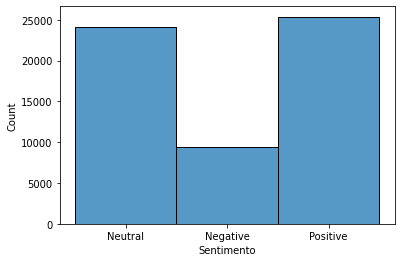

In [14]:
sns.histplot(data = dfTweets["Sentimento"]);

In [15]:
dfTweets.groupby("Sentimento").mean()

,replies,likes,retweets
Sentimento,,,
Negative,0.503132,4.894575,1.286230
Neutral,0.139427,1.555509,0.619749
Positive,0.447050,3.382690,1.331691


In [27]:
dfTweets.groupby("Sentimento").sum()

,replies,likes,retweets
Sentimento,,,
Negative,4739,46102,12115
Neutral,3362,37508,14944
Positive,11343,85829,33789


In [16]:
dfTweets.groupby("date").sum()

,replies,likes,retweets
date,,,
2012-01-01,0,0,0
2012-01-03,0,0,0
2012-01-04,0,0,0
2012-01-05,0,0,0
2012-01-13,0,0,0
...,...,...,...
2019-11-19,15,259,101
2019-11-20,28,144,83
2019-11-21,180,140,47


In [17]:
dfResumoDiario = pd.concat([dfTweets.groupby("date").sum(), dfMaxMin_perDay['variacao']], axis=1).dropna()
dfResumoDiario 

,replies,likes,retweets,variacao
2016-01-02,0.0,0.0,0.0,1.251742
2016-01-03,0.0,0.0,2.0,2.312861
2016-01-04,0.0,0.0,0.0,1.727116
2016-01-05,0.0,0.0,0.0,1.364282
2016-01-06,0.0,0.0,0.0,1.418390
...,...,...,...,...
2019-03-25,0.0,1.0,0.0,2.948034
2019-03-26,6.0,108.0,18.0,1.087892
2019-03-27,0.0,0.0,1.0,3.104028
2019-03-28,23.0,152.0,15.0,0.661960


In [23]:
#mudar isso e deixar de forma melhor
dfResumoDiario['Positivo']  = dfTweets[dfTweets['Sentimento']=='Positive'].groupby("date").count()['Sentimento']
dfResumoDiario['Negative']  = dfTweets[dfTweets['Sentimento']=='Negative'].groupby("date").count()['Sentimento']
dfResumoDiario['Neutral']  = dfTweets[dfTweets['Sentimento']=='Neutral'].groupby("date").count()['Sentimento']
dfResumoDiario = dfResumoDiario.fillna(0)
dfResumoDiario

,replies,likes,retweets,variacao,Positivo,Negative,Neutral
2016-01-02,0.0,0.0,0.0,1.251742,1.0,0.0,1.0
2016-01-03,0.0,0.0,2.0,2.312861,1.0,0.0,1.0
2016-01-04,0.0,0.0,0.0,1.727116,2.0,0.0,0.0
2016-01-05,0.0,0.0,0.0,1.364282,1.0,0.0,0.0
2016-01-06,0.0,0.0,0.0,1.418390,1.0,0.0,0.0
...,...,...,...,...,...,...,...
2019-03-25,0.0,1.0,0.0,2.948034,0.0,0.0,1.0
2019-03-26,6.0,108.0,18.0,1.087892,0.0,1.0,4.0
2019-03-27,0.0,0.0,1.0,3.104028,1.0,1.0,1.0
2019-03-28,23.0,152.0,15.0,0.661960,4.0,2.0,7.0


In [24]:
dfResumoDiario.describe()

,replies,likes,retweets,variacao,Positivo,Negative,Neutral
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,4.047047,38.423423,14.971972,5.719173,3.237237,1.516517,4.416416
std,21.279954,257.915907,100.555308,5.270127,13.918989,6.325623,15.249520
min,0.000000,0.000000,0.000000,0.546209,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.138563,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,4.046756,0.000000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,7.463411,1.000000,1.000000,2.000000
max,343.000000,6164.000000,2159.000000,40.919643,177.000000,92.000000,176.000000


In [25]:
#Sem nomalizar
dfResumoDiario.corr()

,replies,likes,retweets,variacao,Positivo,Negative,Neutral
replies,1.000000,0.669473,0.551937,0.092414,0.627415,0.615393,0.608619
likes,0.669473,1.000000,0.550803,0.045240,0.515245,0.497211,0.483891
retweets,0.551937,0.550803,1.000000,0.043896,0.433359,0.357668,0.380110
variacao,0.092414,0.045240,0.043896,1.000000,0.122812,0.156698,0.124808
Positivo,0.627415,0.515245,0.433359,0.122812,1.000000,0.948815,0.971572
Negative,0.615393,0.497211,0.357668,0.156698,0.948815,1.000000,0.948731
Neutral,0.608619,0.483891,0.380110,0.124808,0.971572,0.948731,1.000000


In [26]:
#normalizando 
dfResumoDiario_norm = pd.DataFrame()
for i in dfResumoDiario:
    dfResumoDiario_norm[i] = (dfResumoDiario[i] -  dfResumoDiario[i].min())/( dfResumoDiario[i].max() - dfResumoDiario[i].min())
dfResumoDiario_norm.corr()

,replies,likes,retweets,variacao,Positivo,Negative,Neutral
replies,1.000000,0.669473,0.551937,0.092414,0.627415,0.615393,0.608619
likes,0.669473,1.000000,0.550803,0.045240,0.515245,0.497211,0.483891
retweets,0.551937,0.550803,1.000000,0.043896,0.433359,0.357668,0.380110
variacao,0.092414,0.045240,0.043896,1.000000,0.122812,0.156698,0.124808
Positivo,0.627415,0.515245,0.433359,0.122812,1.000000,0.948815,0.971572
Negative,0.615393,0.497211,0.357668,0.156698,0.948815,1.000000,0.948731
Neutral,0.608619,0.483891,0.380110,0.124808,0.971572,0.948731,1.000000
